
# (Decision Tree) 

(From scratch and sklearn)

By - DIVYANSH AGARWAL


In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
df=pd.read_csv("income.csv")

In [3]:
df.head()

,RID,age,income,student,credit_rating,Class:buys Computer
0,1,Youth,high,no,fair,no
1,2,Youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes


In [4]:
print("columns :",df.columns)
print("")
print("shape :",df.shape)

columns : Index(['RID', 'age ', 'income', 'student', 'credit_rating',
       'Class:buys Computer'],
      dtype='object')

shape : (14, 6)


# From Scratch (Finding Root Node)

In [5]:
sum_y= sum(df["Class:buys Computer"]== "yes")
sum_n= sum(df["Class:buys Computer"]== "no")
r=14

In [7]:
info = (-sum_y/r * math.log(sum_y/r,2) -sum_n/r * math.log(sum_n/r,2) )
print("info:",info)

info: 0.9402859586706309


# Expected info for each attribute

AGE

In [9]:
# age_y

sum_y = sum((df["Class:buys Computer"]== "yes") & (df['age ']=="Youth")) # =2
sum_n = sum((df["Class:buys Computer"]== "no") & (df['age ']=="Youth")) # =3
s_yn = sum_y + sum_n # =5

info_age_y = s_yn/r * ((-sum_y/s_yn* math.log(sum_y/s_yn,2)) - sum_n/s_yn * math.log(sum_n/s_yn,2))

# age_m

sum_y = sum((df["Class:buys Computer"]== "yes") & (df['age ']=="middle_aged")) # =4
sum_n = sum((df["Class:buys Computer"]== "no") & (df['age ']=="middle_aged")) # =0
s_yn = sum_y + sum_n # =4

# to avoid domain error ignore sum_n 
info_age_m = s_yn/r * ( -sum_y/s_yn* math.log(sum_y/s_yn,2))

#age_s

sum_y = sum((df["Class:buys Computer"]== "yes") & (df['age ']=="senior")) # =4
sum_n = sum((df["Class:buys Computer"]== "no") & (df['age ']=="senior")) # =0
s_yn = sum_y + sum_n # =4
info_age_s = s_yn/r * ((-sum_y/s_yn* math.log(sum_y/s_yn,2)) - sum_n/s_yn * math.log(sum_n/s_yn,2))


# total
info_age= info_age_y+ info_age_m+ info_age_s

INCOME

In [10]:
# income_l

sum_y = sum((df["Class:buys Computer"]== "yes") & (df['income']=="low")) # =3
sum_n = sum((df["Class:buys Computer"]== "no") & (df['income']=="low")) # =1
s_yn = sum_y + sum_n # =4

info_income_l = s_yn/r * ((-sum_y/s_yn* math.log(sum_y/s_yn,2)) - sum_n/s_yn * math.log(sum_n/s_yn,2))

# income_m

sum_y = sum((df["Class:buys Computer"]== "yes") & (df['income']=="medium")) # =3
sum_n = sum((df["Class:buys Computer"]== "no") & (df['income']=="medium")) # =1
s_yn = sum_y + sum_n # =4

info_income_m = s_yn/r * ((-sum_y/s_yn* math.log(sum_y/s_yn,2)) - sum_n/s_yn * math.log(sum_n/s_yn,2))

# income_h

sum_y = sum((df["Class:buys Computer"]== "yes") & (df['income']=="high")) # =4
sum_n = sum((df["Class:buys Computer"]== "no") & (df['income']=="high")) # =2
s_yn = sum_y + sum_n # =6

info_income_h = s_yn/r * ((-sum_y/s_yn* math.log(sum_y/s_yn,2)) - sum_n/s_yn * math.log(sum_n/s_yn,2))


# total

info_income = info_income_l + info_income_m + info_income_h

STUDENT

In [11]:
# student_y

sum_y = sum((df["Class:buys Computer"]== "yes") & (df['student']=="yes")) # =6
sum_n = sum((df["Class:buys Computer"]== "no") & (df['student']=="yes")) # =1
s_yn = sum_y + sum_n # =10

info_stu_y = s_yn/r * ((-sum_y/s_yn* math.log(sum_y/s_yn,2)) - sum_n/s_yn * math.log(sum_n/s_yn,2))

# student_n

sum_y = sum((df["Class:buys Computer"]== "yes") & (df['student']=="no")) # =3
sum_n = sum((df["Class:buys Computer"]== "no") & (df['student']=="no")) # =4
s_yn = sum_y + sum_n # =7

info_stu_n = s_yn/r * ((-sum_y/s_yn* math.log(sum_y/s_yn,2)) - sum_n/s_yn * math.log(sum_n/s_yn,2))

# total

info_stu = info_stu_y + info_stu_n

CREDIT

In [12]:
# credit_f

sum_y = sum((df["Class:buys Computer"]== "yes") & (df['credit_rating']=="fair")) # =6
sum_n = sum((df["Class:buys Computer"]== "no") & (df['credit_rating']=="fair")) # =2
s_yn = sum_y + sum_n # =8

info_cred_f = s_yn/r * ((-sum_y/s_yn* math.log(sum_y/s_yn,2)) - sum_n/s_yn * math.log(sum_n/s_yn,2))

# credit_e

sum_y = sum((df["Class:buys Computer"]== "yes") & (df['credit_rating']=="excellent")) # =3
sum_n = sum((df["Class:buys Computer"]== "no") & (df['credit_rating']=="excellent")) # =3
s_yn = sum_y + sum_n # =6

info_cred_e = s_yn/r * ((-sum_y/s_yn* math.log(sum_y/s_yn,2)) - sum_n/s_yn * math.log(sum_n/s_yn,2))

# total

info_cred = info_cred_f + info_cred_e

# INFORMATION GIAN

In [13]:
# calculating gains

gain_age = info - info_age
gain_income = info - info_income
gain_stu = info - info_stu
gain_cred = info - info_cred

In [14]:
# finding max_gain

ls = [gain_age, gain_income, gain_stu, gain_cred]
data = {"gain" : ls, "attribute" : ["age", "income", "student", "credit_rating"]}

df2 = pd.DataFrame(data= data, columns = ["gain", "attribute"])
df3 = df2[df2["gain"] == df2["gain"].max()]

display(df2)
print("ROOT NODE - (MAX GAIN)")
display(df3)

,gain,attribute
0,0.246750,age
1,0.029223,income
2,0.151836,student
3,0.048127,credit_rating


ROOT NODE - (MAX GAIN)


,gain,attribute
0,0.24675,age


DISPLAYING DATA BASED ON AGE GROUP

In [15]:
df4= df[df["age "]=="Youth"]
df5=df[df["age "]=="middle_aged"]
df6=df[df["age "]=="senior"]

print("YOUTH")
display(df4.loc[:,'age ' : 'Class:buys Computer'])

print("")

print("MIDDLE AGE")
display(df5.loc[:,'age ' : 'Class:buys Computer'])
print("")

print("SENIOR")
display(df6.loc[:,'age ' : 'Class:buys Computer'])

YOUTH


,age,income,student,credit_rating,Class:buys Computer
0,Youth,high,no,fair,no
1,Youth,high,no,excellent,no
7,Youth,medium,no,fair,no
8,Youth,low,yes,fair,yes
10,Youth,medium,yes,excellent,yes



MIDDLE AGE


,age,income,student,credit_rating,Class:buys Computer
2,middle_aged,high,no,fair,yes
6,middle_aged,low,yes,excellent,yes
11,middle_aged,medium,no,excellent,yes
12,middle_aged,high,yes,fair,yes



SENIOR


,age,income,student,credit_rating,Class:buys Computer
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
9,senior,medium,yes,fair,yes
13,senior,medium,no,excellent,no


# Visualizing Probabilities using BAR CHART

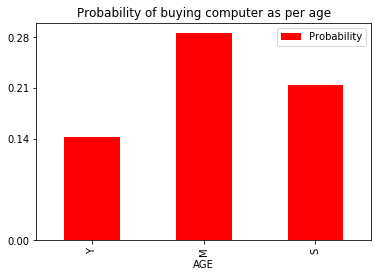

In [16]:
# plotting probabilities

import matplotlib.pyplot as plt
%matplotlib inline


sum_y = sum((df["Class:buys Computer"]== "yes") & (df['age ']=="Youth")) 
p_y = sum_y/r
sum_y = sum((df["Class:buys Computer"]== "yes") & (df['age ']=="middle_aged"))
p_m = sum_y/r
sum_y = sum((df["Class:buys Computer"]== "yes") & (df['age ']=="senior"))
p_s = sum_y/r
data= {"Youth": p_y, "Middle Age": p_m, "Senior": p_s}

pr = pd.DataFrame({'AGE':['Y', 'M', 'S'], 'Probability':[p_y, p_m, p_s]})

pr.plot.bar(x="AGE", y="Probability", title = "Probability of buying computer as per age",color= "RED",

           yticks=[0,0.14,0.21,0.28])

# Scikit-learn 

ENCODING CATEGORICAL DATA

In [17]:

cat_df = df.drop("RID", axis=1)

en1= {"Youth":0, "middle_aged":1, "senior":2}
en2= {"low":0, "medium":1, "high":2}
en3= {"no":0, "yes":1}
en4= {"fair":0, 'excellent':1}
en5= {"no":0, "yes":1}

cat_df["age "]                = cat_df["age "].map(en1)
cat_df["income"]              = cat_df["income"].map(en2)
cat_df["student"]             = cat_df["student"].map(en3)
cat_df["credit_rating"]       = cat_df["credit_rating"].map(en4)

  

In [18]:
cat_df.head()

,age,income,student,credit_rating,Class:buys Computer
0,0,2,0,0,no
1,0,2,0,1,no
2,1,2,0,0,yes
3,2,1,0,0,yes
4,2,0,1,0,yes


In [19]:
#split - train and test
from sklearn.model_selection import train_test_split

In [20]:
X = cat_df.drop('Class:buys Computer', axis=1)
y = cat_df['Class:buys Computer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [26]:
X_test

,age,income,student,credit_rating
12,1,2,1,0
3,2,1,0,0
5,2,0,1,1
10,0,1,1,1
13,2,1,0,1


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

CHECKING RESULTS

In [25]:
predictions = dtree.predict(X_test)
print("Predicted Values:-", end=' ')
print(predictions)
print("-------------------------------------------------------- ")

print("Actual Values:-")
print(y_test, end="")
print("")
print("-------------------------------------------------------- ")

print("Number of mislabeled values out of a total %d values:- %d" % (X_test.shape[0], (y_test != predictions).sum()))
print("-------------------------------------------------------- ")

import sklearn.metrics
print("Accuracy:", end=" ")
a=sklearn.metrics.accuracy_score(y_test, predictions)
print("%.3f"%a, end=" --> ")
print(a*100,end='')
print('%')

Predicted Values:- ['yes' 'yes' 'yes' 'yes' 'yes']
-------------------------------------------------------- 
Actual Values:-
12    yes
3     yes
5      no
10    yes
13     no
Name: Class:buys Computer, dtype: object
-------------------------------------------------------- 
Number of mislabeled values out of a total 5 values:- 2
-------------------------------------------------------- 
Accuracy: 0.600 --> 60.0%


MAKING PREDICTIONS

In [27]:
predict1 = dtree.predict([[2,0,2,1]])
predict2 = dtree.predict([[2,2,1,1]]) 
print(predict1, predict2)

['yes'] ['yes']


# Visualizing Tree

C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


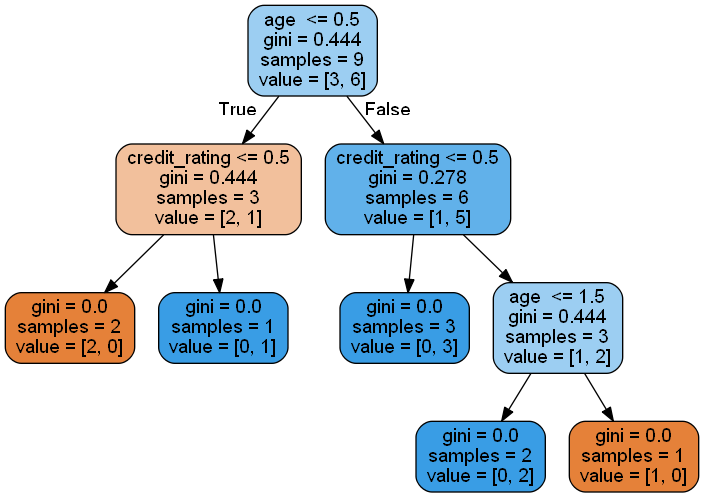

In [24]:

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
features = ['age ', 'income', 'student', 'credit_rating']
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names = features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  
